In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Importing Data
%store -r imdb

In [5]:
#imdb.dtypes

In [3]:
imdb.select_dtypes(['int64']).columns

Index(['year', 'duration', 'votes', 'total_votes', 'votes_10', 'votes_9',
       'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
       'votes_2', 'votes_1'],
      dtype='object')

In [4]:
imdb[['year', 'duration', 'votes', 'total_votes', 'votes_10', 'votes_9',
       'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
       'votes_2', 'votes_1']] = imdb[['year', 'duration', 'votes', 'total_votes', 'votes_10', 'votes_9',
       'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
       'votes_2', 'votes_1']].astype('float64')

In [6]:
title_columns = imdb.select_dtypes(['object'])
title_columns = title_columns.drop(['worlwide_gross_income', 'budget', 'usa_gross_income', 
                               'description', 'original_title', 'date_published',
                               'genre', 'country', 'language', 'director', 'writer',
                               'production_company', 'actors'], axis=1)
title_columns.head(2)

,imdb_title_id,title
0,tt0000574,The Story of the Kelly Gang
1,tt0001892,Den sorte drøm


In [7]:
float_columns =  imdb.select_dtypes(['float64'])
float_columns.head(2)

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,1906.0,70.0,6.1,537.0,0.0,7.0,7.0,6.1,537.0,6.3,...,6.0,19.0,6.6,14.0,6.3,64.0,6.0,89.0,6.2,309.0
1,1911.0,53.0,5.9,171.0,0.0,4.0,2.0,5.9,171.0,6.1,...,5.8,4.0,6.5,8.0,5.9,29.0,6.2,27.0,6.0,114.0


In [8]:
float_imdb = pd.concat([float_columns, title_columns], axis=1)

float_imdb.head(2)

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,...,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,imdb_title_id,title
0,1906.0,70.0,6.1,537.0,0.0,7.0,7.0,6.1,537.0,6.3,...,6.6,14.0,6.3,64.0,6.0,89.0,6.2,309.0,tt0000574,The Story of the Kelly Gang
1,1911.0,53.0,5.9,171.0,0.0,4.0,2.0,5.9,171.0,6.1,...,6.5,8.0,5.9,29.0,6.2,27.0,6.0,114.0,tt0001892,Den sorte drøm


In [9]:
%store float_imdb

Stored 'float_imdb' (DataFrame)


In [11]:
X_1 = new_imdb.drop(['avg_vote', 'imdb_title_id', 'title'], axis=1)
X_1.head(2)

,year,duration,votes,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,1906.0,70.0,537.0,0.0,7.0,7.0,6.1,537.0,6.3,6.0,...,6.0,19.0,6.6,14.0,6.3,64.0,6.0,89.0,6.2,309.0
1,1911.0,53.0,171.0,0.0,4.0,2.0,5.9,171.0,6.1,6.0,...,5.8,4.0,6.5,8.0,5.9,29.0,6.2,27.0,6.0,114.0


In [12]:
Y_1 = new_imdb['avg_vote']
Y_1.head(2)

0    6.1
1    5.9
Name: avg_vote, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size=0.33, random_state=42)

In [14]:
model_0 = XGBClassifier()

In [15]:
model_0.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [85]:
# Make predictions on model
y_pred = model_0.predict(X_test)

In [86]:
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Root Mean Squared Error: 0.00334


In [100]:
# Predicting Movies with XGB
top20_movies = X_1.sort_values(by = ['weighted_average_vote'], ascending=False, axis=0).head(20)
top20_movies.head()

,year,duration,votes,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
52002,2019.0,132.0,587.0,0.0,11.0,0.0,10.0,587.0,9.6,10.0,...,10.0,74.0,10.0,6.0,6.6,5.0,10.0,308.0,10.0,176.0
77908,2019.0,100.0,2360.0,0.0,6.0,10.0,10.0,2360.0,10.0,10.0,...,10.0,143.0,10.0,23.0,6.2,4.0,10.0,416.0,10.0,1570.0
81138,2019.0,138.0,425.0,0.0,2.0,0.0,9.8,425.0,9.5,10.0,...,0.0,0.0,0.0,0.0,3.5,2.0,1.0,1.0,3.5,6.0
51300,2019.0,131.0,133.0,0.0,0.0,0.0,9.7,133.0,9.3,10.0,...,10.0,85.0,10.0,24.0,6.5,6.0,8.8,22.0,9.9,99.0
81133,2019.0,140.0,1176.0,0.0,24.0,1.0,9.6,1176.0,9.7,10.0,...,0.0,0.0,0.0,0.0,1.0,1.0,5.6,7.0,7.5,42.0


In [89]:

y_top20_movies = model_0.predict(top20_movies)
y_top20_movies

array([ 9.5, 10. ,  9.8,  9.5,  9.6,  9.6,  9.5,  9.5,  9.5,  9.4,  9.4,
        9.4,  9.4,  9.4,  9.4,  9.4,  9.2,  9.3,  9.3,  9.2])

In [148]:

y_top20_movies = pd.DataFrame(y_top20_movies)
y_top20_movies.columns = ['Predicted Avg Score']
y_top20_movies.head(2)

,Predicted Avg Score
0,9.5
1,10.0


In [162]:

movie_names = new_imdb.sort_values(by = ['weighted_average_vote'], ascending=False, axis=0).head(20)
movie_names = pd.DataFrame(movie_names['title'])
movie_names = movie_names.reset_index()
movie_names = movie_names.drop('index', axis=1)
movie_names.head()


,title
0,Kirket
1,Love in Kilnerry
2,Gini Helida Kathe
3,Runam
4,Android Kunjappan Version 5.25


In [163]:

actual_avg_vote = new_imdb.sort_values(by = ['weighted_average_vote'], ascending=False, axis=0).head(20)
actual_avg_vote = pd.DataFrame(actual_avg_vote['avg_vote'])
actual_avg_vote = actual_avg_vote.reset_index()
actual_avg_vote = actual_avg_vote.drop('index', axis=1)
actual_avg_vote.head()


,avg_vote
0,10.0
1,10.0
2,9.8
3,9.7
4,9.6


In [166]:

movie_names_pred = pd.concat([movie_names,actual_avg_vote,y_top20_movies], axis=1)
movie_names_pred

,title,avg_vote,Predicted Avg Score
0,Kirket,10.0,9.5
1,Love in Kilnerry,10.0,10.0
2,Gini Helida Kathe,9.8,9.8
3,Runam,9.7,9.5
4,Android Kunjappan Version 5.25,9.6,9.6
5,Fan,9.6,9.6
6,The Brighton Miracle,9.5,9.5
7,Yeh Suhaagraat Impossible,9.5,9.5
8,Safe,9.5,9.5
9,Ananthu V/S Nusrath,9.4,9.4


In [16]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [ ]:
X_2 = new_imdb

ImportError: You must install graphviz to plot tree

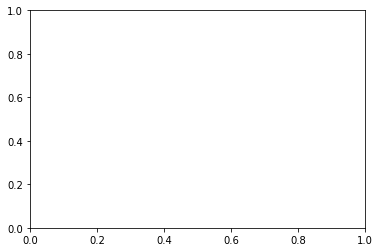

In [17]:

plot_tree(model_0, num_trees=0, rankdir='LR')